## This notebook will go through the processed csv and perform exploratory data analysis to find any issues that need to be fixed before model creation

In [32]:
#import libraries
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display
import sweetviz as sv
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

## Data Dictionary
- FoodID : Unique Identifier for the food (numerical)
- FoodDescription : Name and contents of the food (text)
- FoodGroup : 23 Groups of food (categorical)
- PROTValue : Value of Protein Nutreint in the food in g/100g
- FATValue : Value of Total Fat in the food in g/100g
- CARBValue : Value of Total Carbohydrate in the food in g/100g
- STARValue : Value of Starch in Carbohydrates in g/100g
- TSUGValue : Value of Sugar in Carbohydrates in g/100g
- TDFValue : Value of Dietary Fibre in Carbohydrates in g/100g
- TSATValue : Value of Saturated Fat in Fats in g/100g
- MUFAValue : Value of Monounsaturated Fat in Fats in g/100g
- PUFAValue : Value of Polyunsaturated Fat in Fats in g/100g

## Important Information
- Get the user's age, height in cm, weight in kg and gender for user profile building
- Using Harris-Benedict Equation (Needs.pdf) for Basal Energy Expenditure (BEE), find the calorie intake required per day
- Requirement of Protein in grams = weight in kg
- Calorie of Protein = 4 * Protein in grams
- Find out the percentage of protein by dividing protein calorie by total calorie
- 60% of Calories should be Carbohydrates with more TDF,STAR and less TSUG
- Calculate carbohydrates in grams using CalorieCount/4
- Leftover calories need to be Fat with more MUFA,PUFA and less TSAT
- Calculate fat in grams using CalorieCount/9
- Input will be the requirement of Carbohydrates,Proteins,Fats calculated above
- Output should be Foods that meet the needs with carbohydrates favoring TDF and STAR and Fats favoring MUFA and PUFA
- TSAT should not be more than 10% of Fat intake
- TSUG should not be more than 10% of Carbohydrate intake

In [33]:
food_data_df = pd.read_csv('FoodNutritionData.csv')
display(food_data_df.head(5))

FoodID                                    FoodDescription       FoodGroup  \
0       2                                     Cheese souffle    Mixed Dishes   
1       4                       Chop suey, with meat, canned    Mixed Dishes   
2       5                   Chinese dish, chow mein, chicken    Mixed Dishes   
3       6                                       Corn fritter  Baked Products   
4       7  Beef pot roast, with browned potatoes, peas an...    Mixed Dishes   

   PROTValue  FATValue  CARBValue  STARValue  TSUGValue  TDFValue  TSATValue  \
0       9.54     15.70       5.91       0.00       2.66       0.1      5.742   
1       4.07      2.80       5.29       0.00       3.40       1.1      0.364   
2       6.76      2.80       8.29       3.99       1.74       1.0      0.490   
3       8.55     21.24      38.62       0.00       2.85       2.0      5.455   
4      21.29      5.25      10.72       0.00       1.44       1.6      1.872   

   MUFAValue  PUFAValue  
0      5.820      2.770  
1      1.540      0.750  
2      0.613      1.226  
3      8.543      5.564  
4      2.552      0.709

In [34]:
food_data_df.dtypes

FoodID               int64
FoodDescription     object
FoodGroup           object
PROTValue          float64
FATValue           float64
CARBValue          float64
STARValue          float64
TSUGValue          float64
TDFValue           float64
TSATValue          float64
MUFAValue          float64
PUFAValue          float64
dtype: object

In [35]:
sv_analyzer = sv.analyze(food_data_df)
sv_analyzer.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [36]:
food_data_df.describe(include='all')

FoodID       FoodDescription  \
count     5690.000000                  5690   
unique            NaN                  5689   
top               NaN  Beans, hyacinth, raw   
freq              NaN                     2   
mean    100722.967311                   NaN   
std     197883.301111                   NaN   
min          2.000000                   NaN   
25%       2136.250000                   NaN   
50%       3855.500000                   NaN   
75%       5869.750000                   NaN   
max     503380.000000                   NaN   

                                FoodGroup    PROTValue     FATValue  \
count                                5690  5690.000000  5690.000000   
unique                                 23          NaN          NaN   
top     Vegetables and Vegetable Products          NaN          NaN   
freq                                  785          NaN          NaN   
mean                                  NaN    11.057056     9.954095   
std                                   NaN    10.843366    16.718251   
min                                   NaN     0.000000     0.000000   
25%                                   NaN     2.110000     0.590000   
50%                                   NaN     7.625000     3.755000   
75%                                   NaN    18.757500    12.200000   
max                                   NaN    85.600000   100.000000   

          CARBValue    STARValue    TSUGValue     TDFValue    TSATValue  \
count   5690.000000  5690.000000  5690.000000  5690.000000  5690.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      21.980529     1.345325     6.296146     2.338330     2.936216   
std       26.537885     6.910980    13.877995     4.753653     5.683242   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.500000     0.000000     0.000000     0.000000     0.076000   
50%       10.265000     0.000000     0.350000     0.700000     0.984500   
75%       32.075000     0.000000     4.740000     2.675000     3.446000   
max      100.000000    73.300000    99.800000    79.000000    95.600000   

          MUFAValue    PUFAValue  
count   5690.000000  5690.000000  
unique          NaN          NaN  
top             NaN          NaN  
freq            NaN          NaN  
mean       3.695394     2.046706  
std        7.640306     5.075961  
min        0.000000     0.000000  
25%        0.041000     0.100000  
50%        1.000000     0.534000  
75%        4.317250     1.813000  
max       83.689000    74.623000

### Number of Rows and Columns in Database

In [37]:
print('rows',food_data_df.shape, 'columns') 

rows (5690, 12) columns


### Total unique elements in each category

In [38]:
print(food_data_df.nunique())

FoodID             5690
FoodDescription    5689
FoodGroup            23
PROTValue          2261
FATValue           1913
CARBValue          2756
STARValue           360
TSUGValue          1505
TDFValue            237
TSATValue          2812
MUFAValue          2880
PUFAValue          2381
dtype: int64


### Total number of groups for different food along with number of contents in each category of group

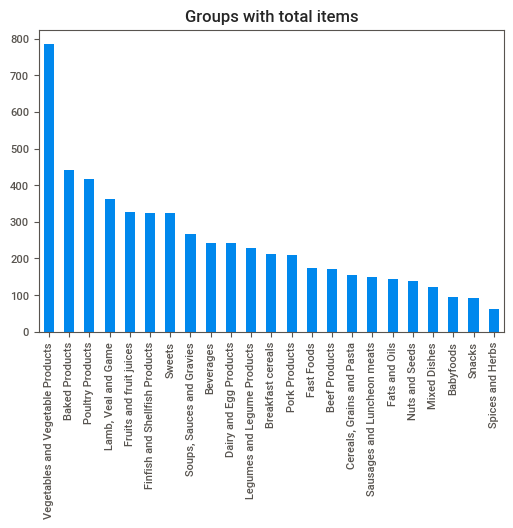

In [39]:
food_data_df['FoodGroup'].value_counts().plot.bar(title='Groups with total items')

Shape of your Data Set: (5690, 12)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  9
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    12 Predictors classified...
        This does not include the Target column(s)
        2 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 45


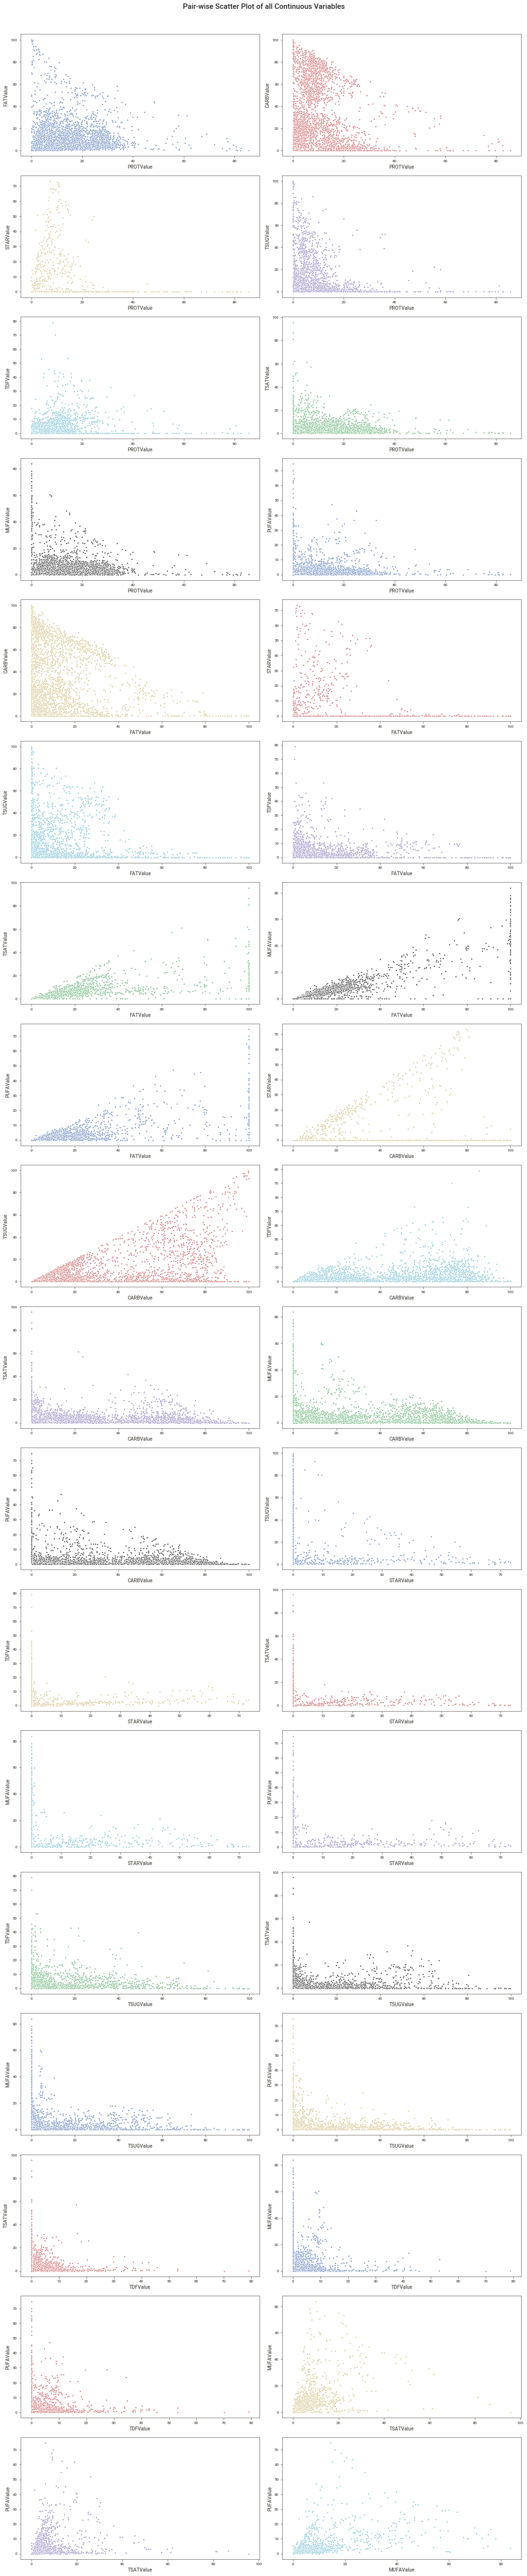

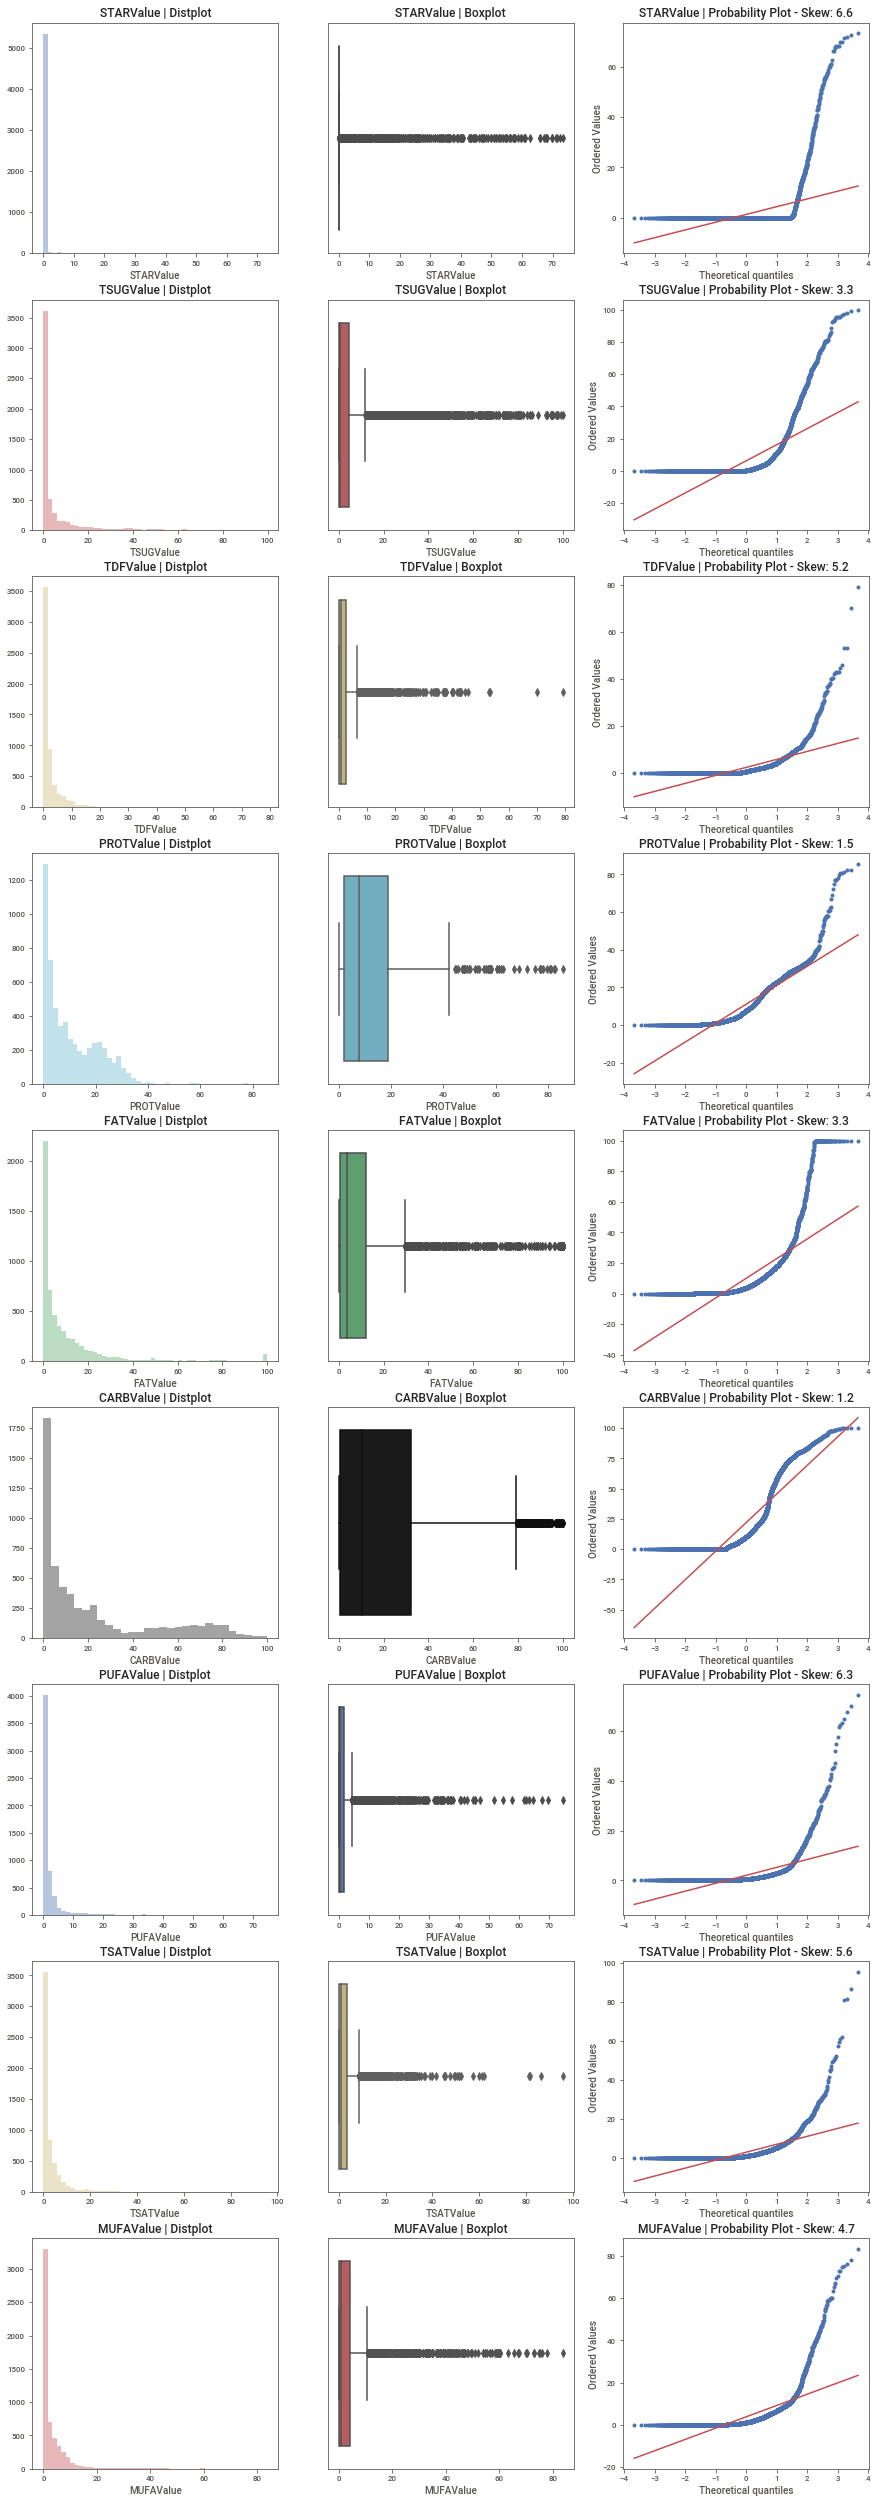

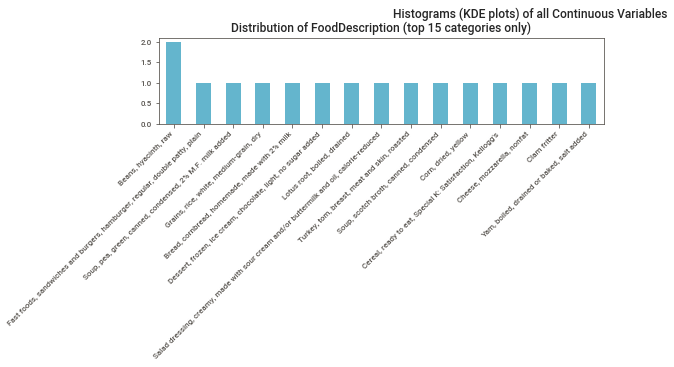

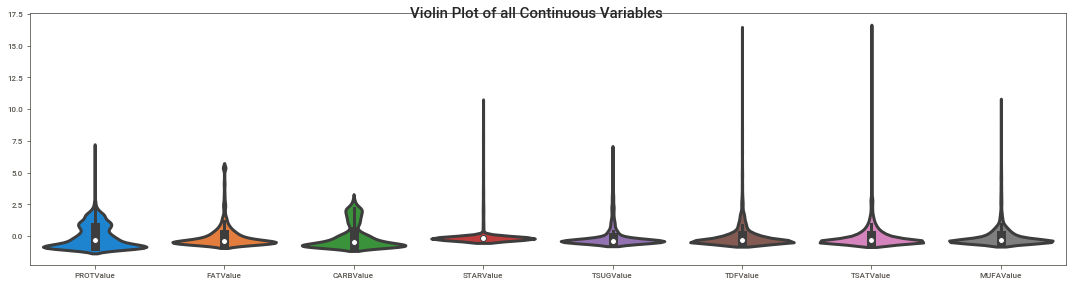

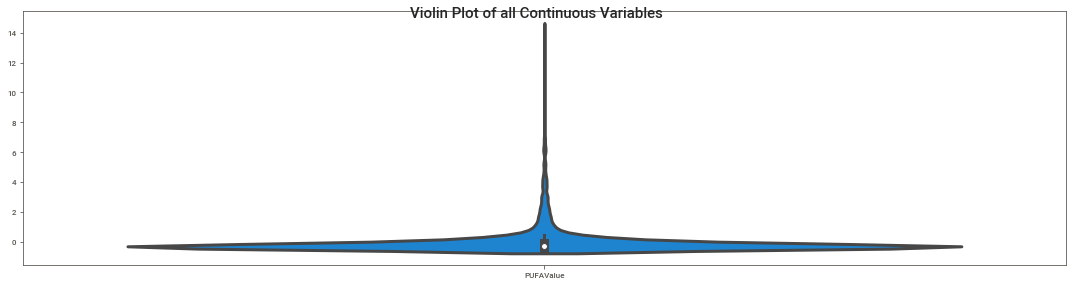

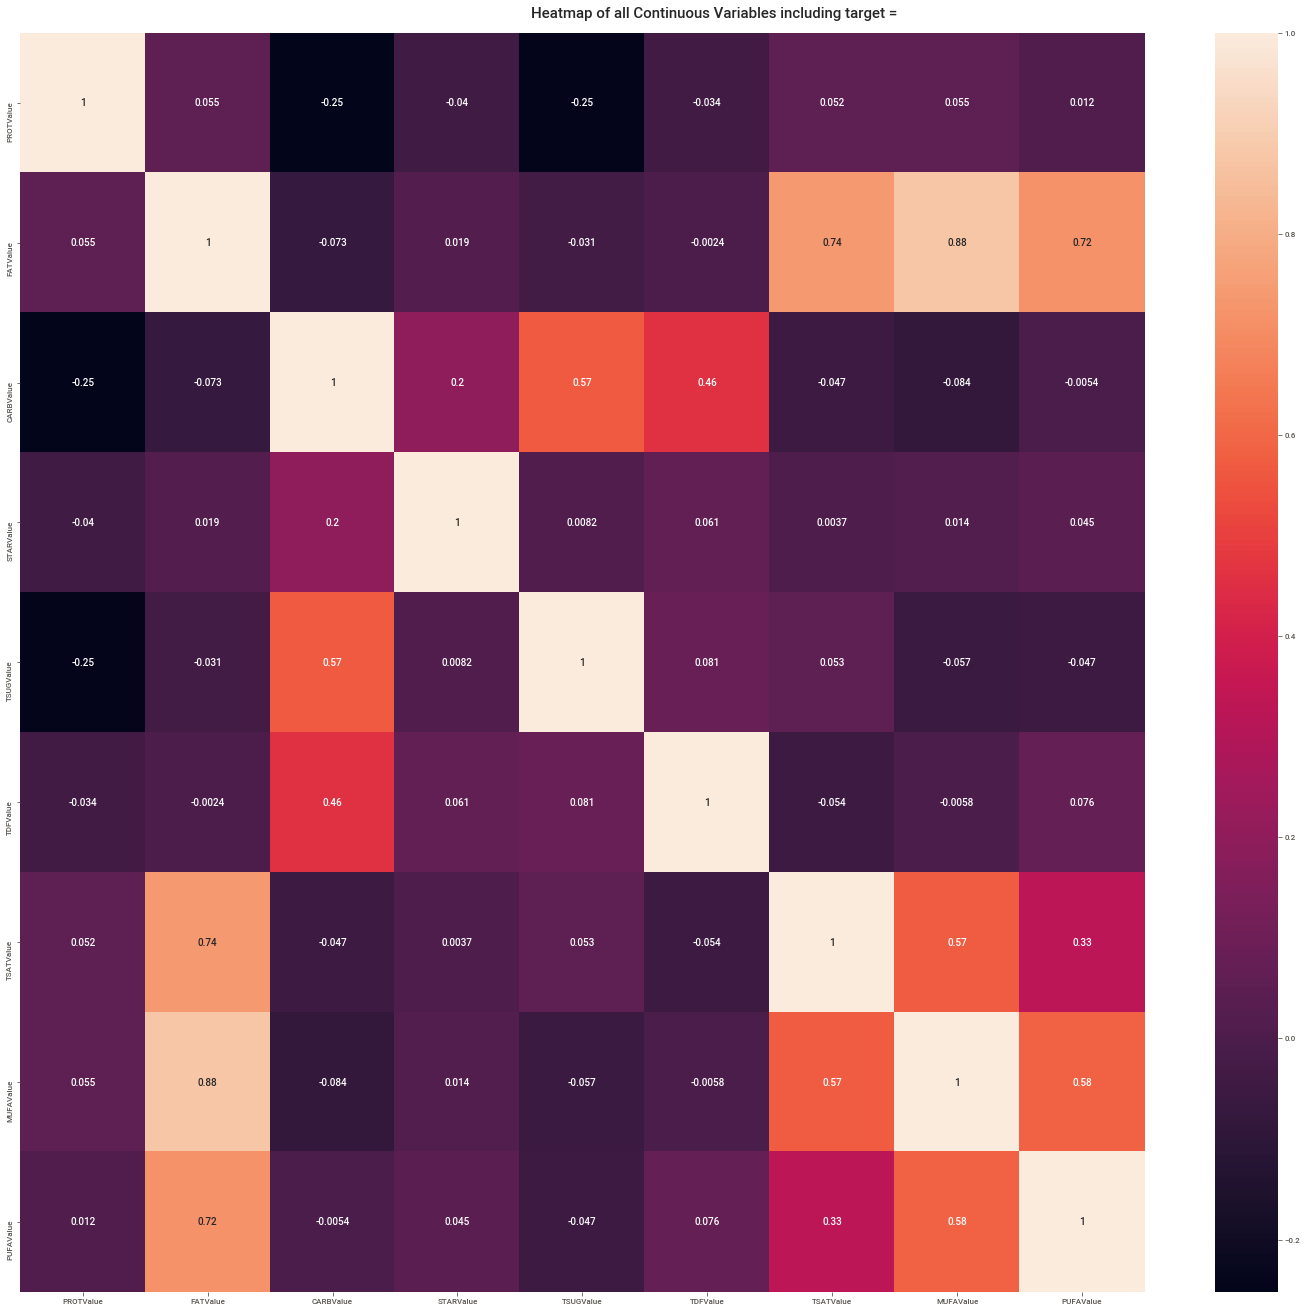

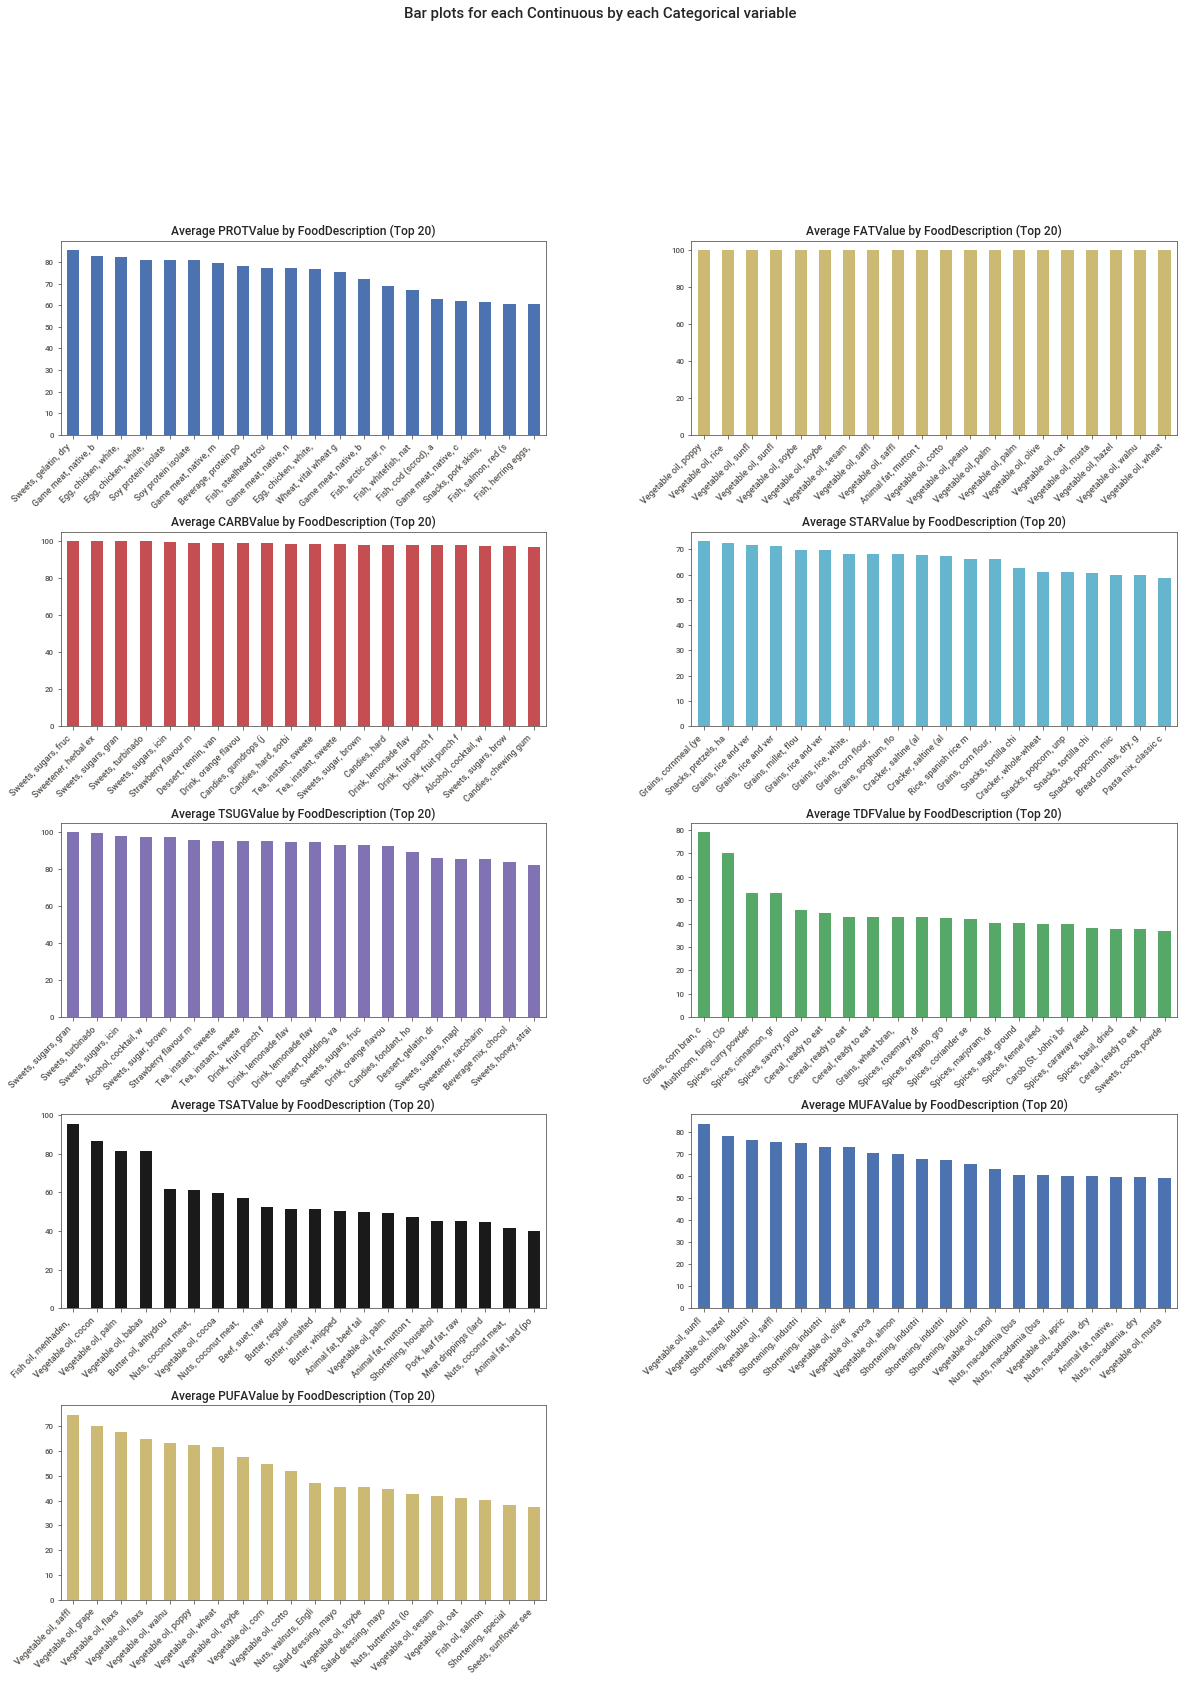

Time to run AutoViz (in seconds) = 10.098

 ###################### VISUALIZATION Completed ########################


In [40]:
df = AV.AutoViz('FoodNutritionData.csv')

Shape of your Data Set: (5690, 12)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  9
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    11 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables

################ Multi_Classification VISUALIZATION Started #####################


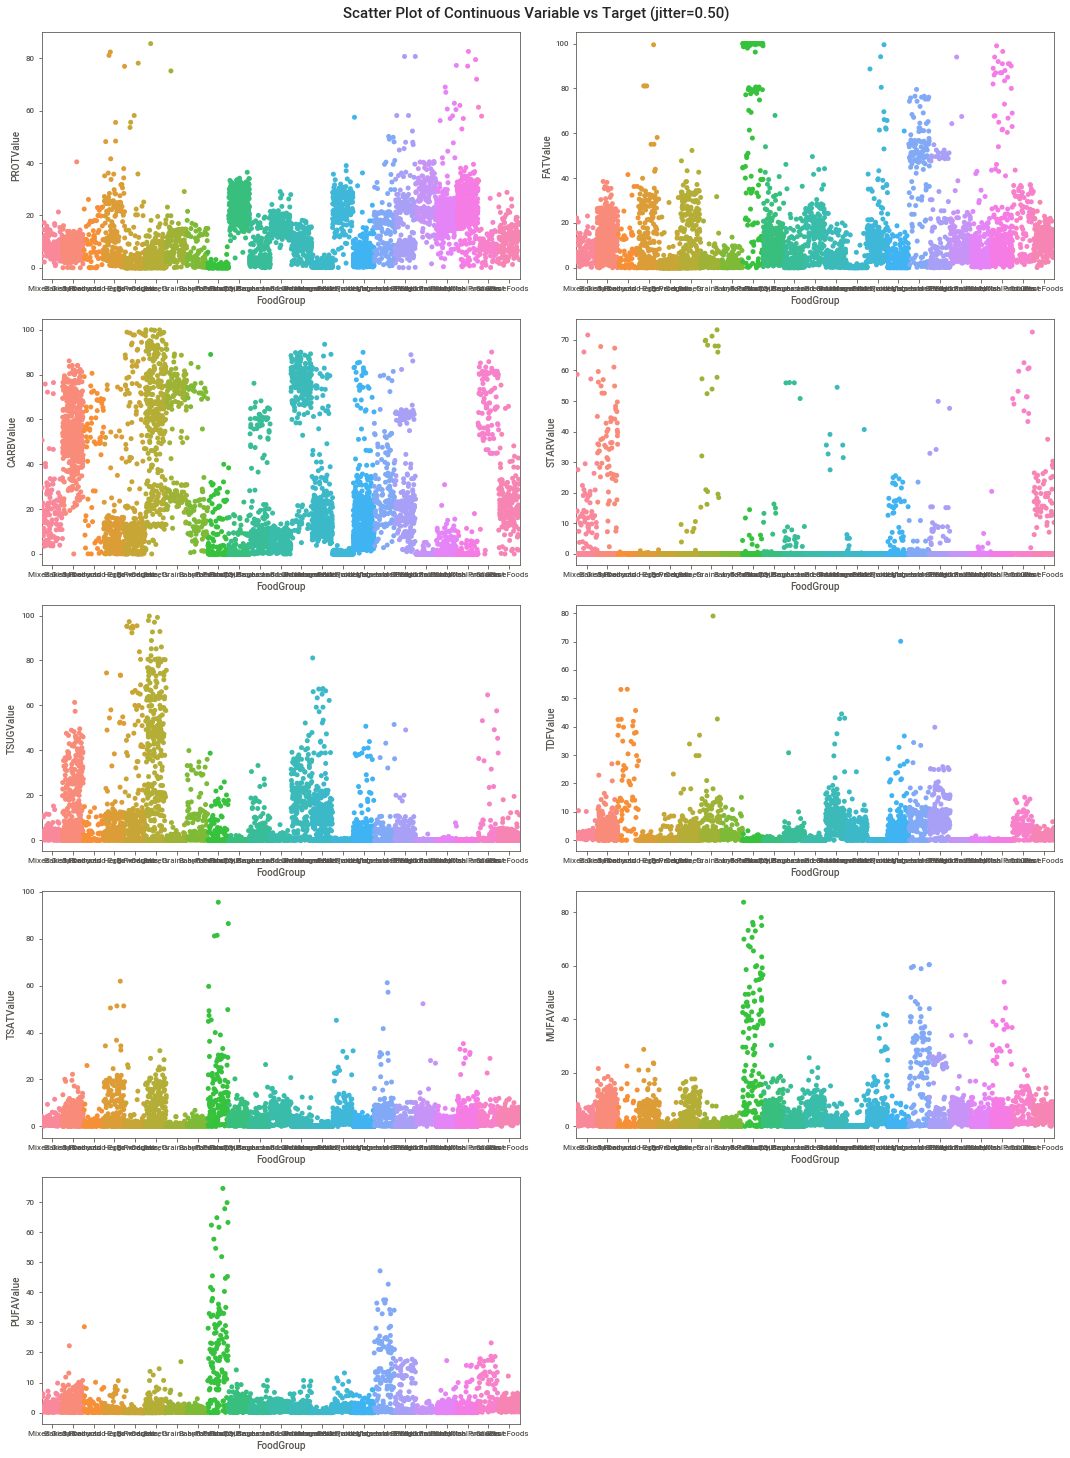

Total Number of Scatter Plots = 45


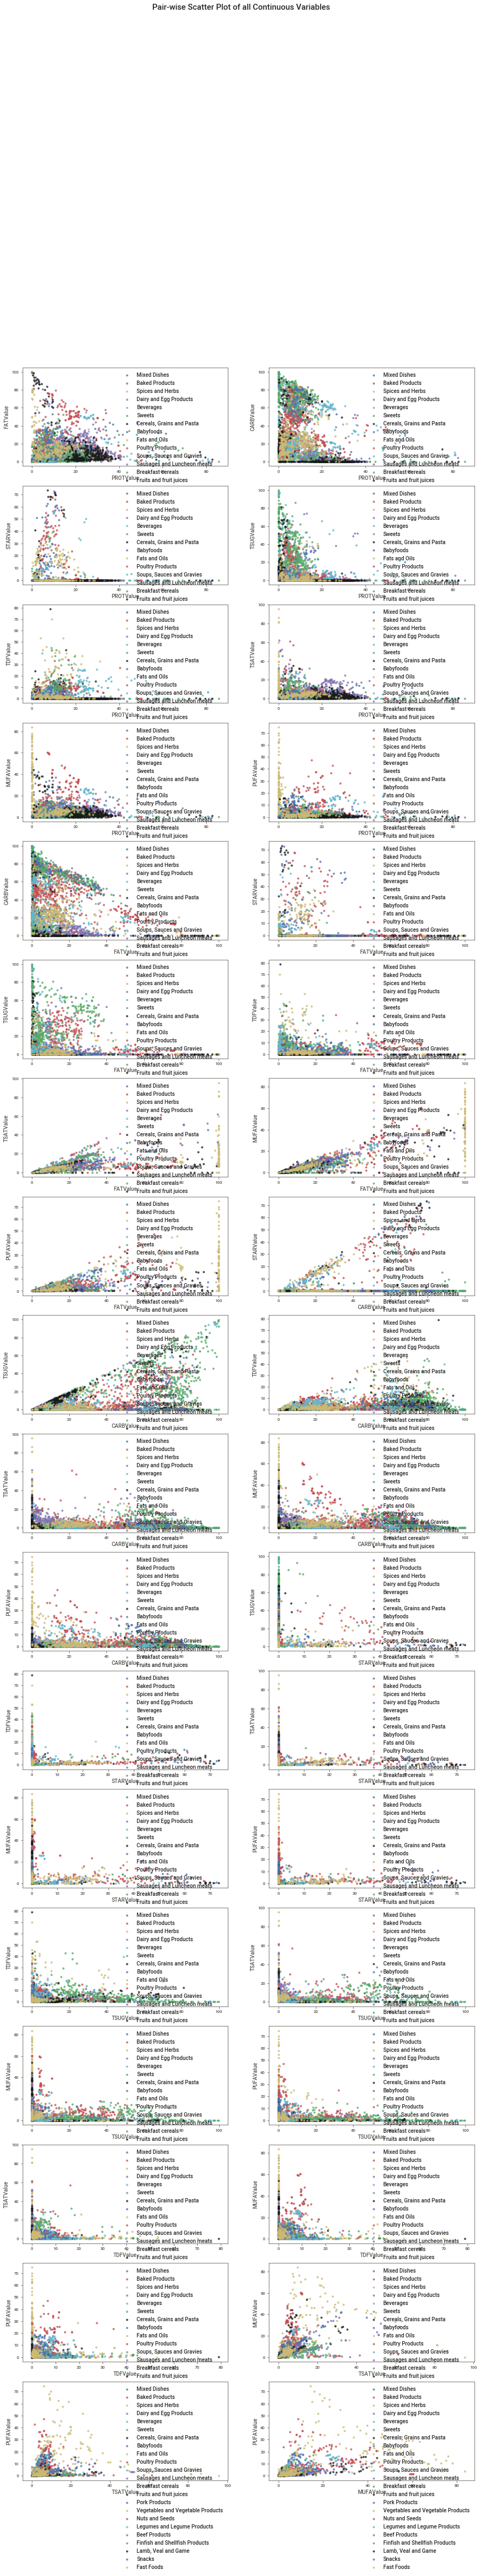

Could not draw Distribution Plots


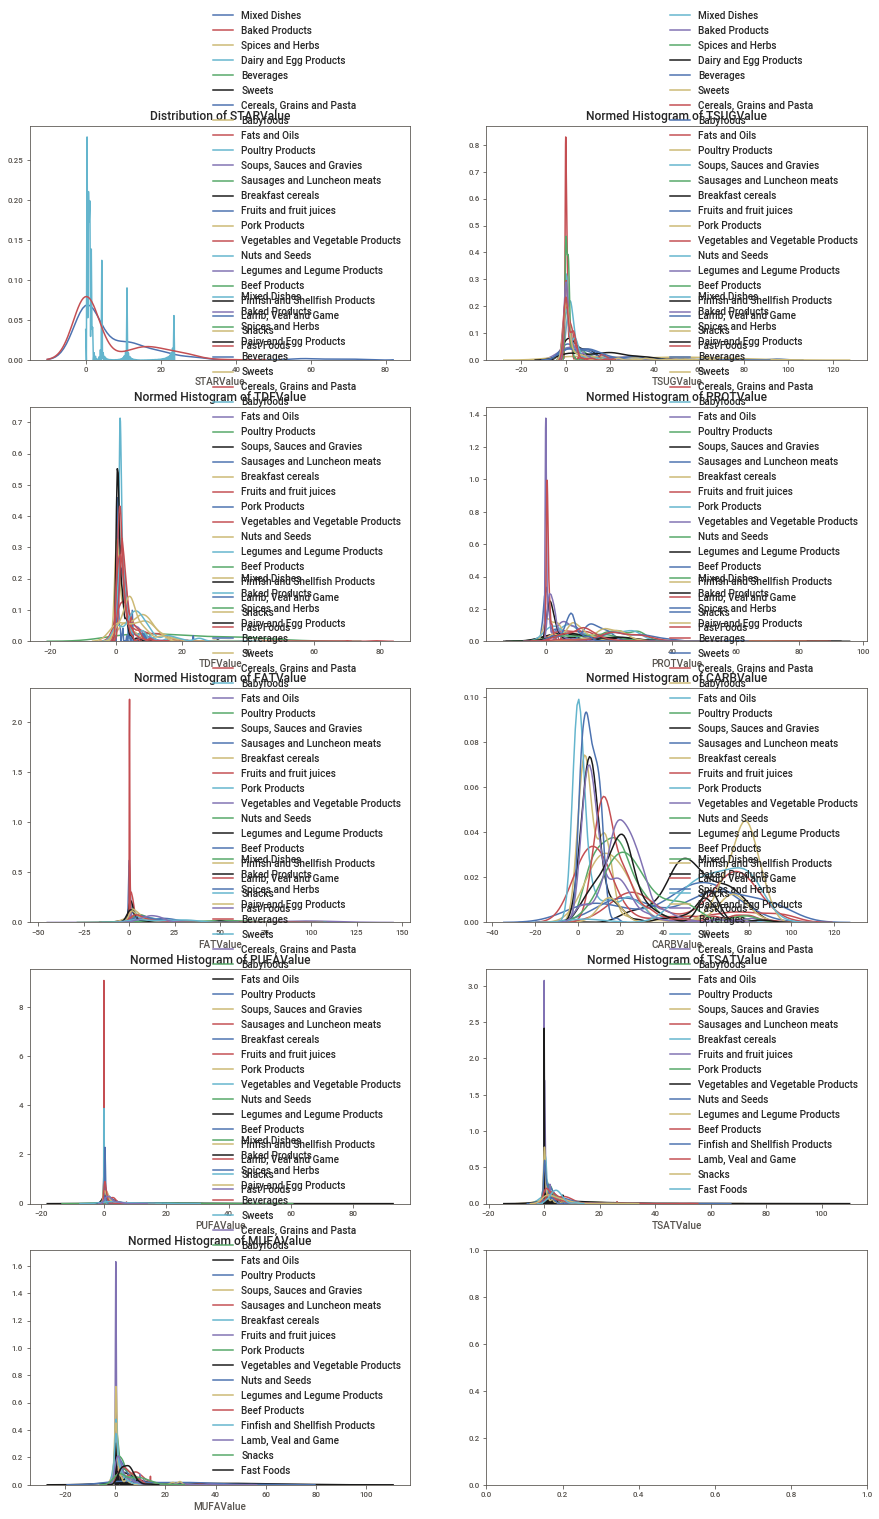

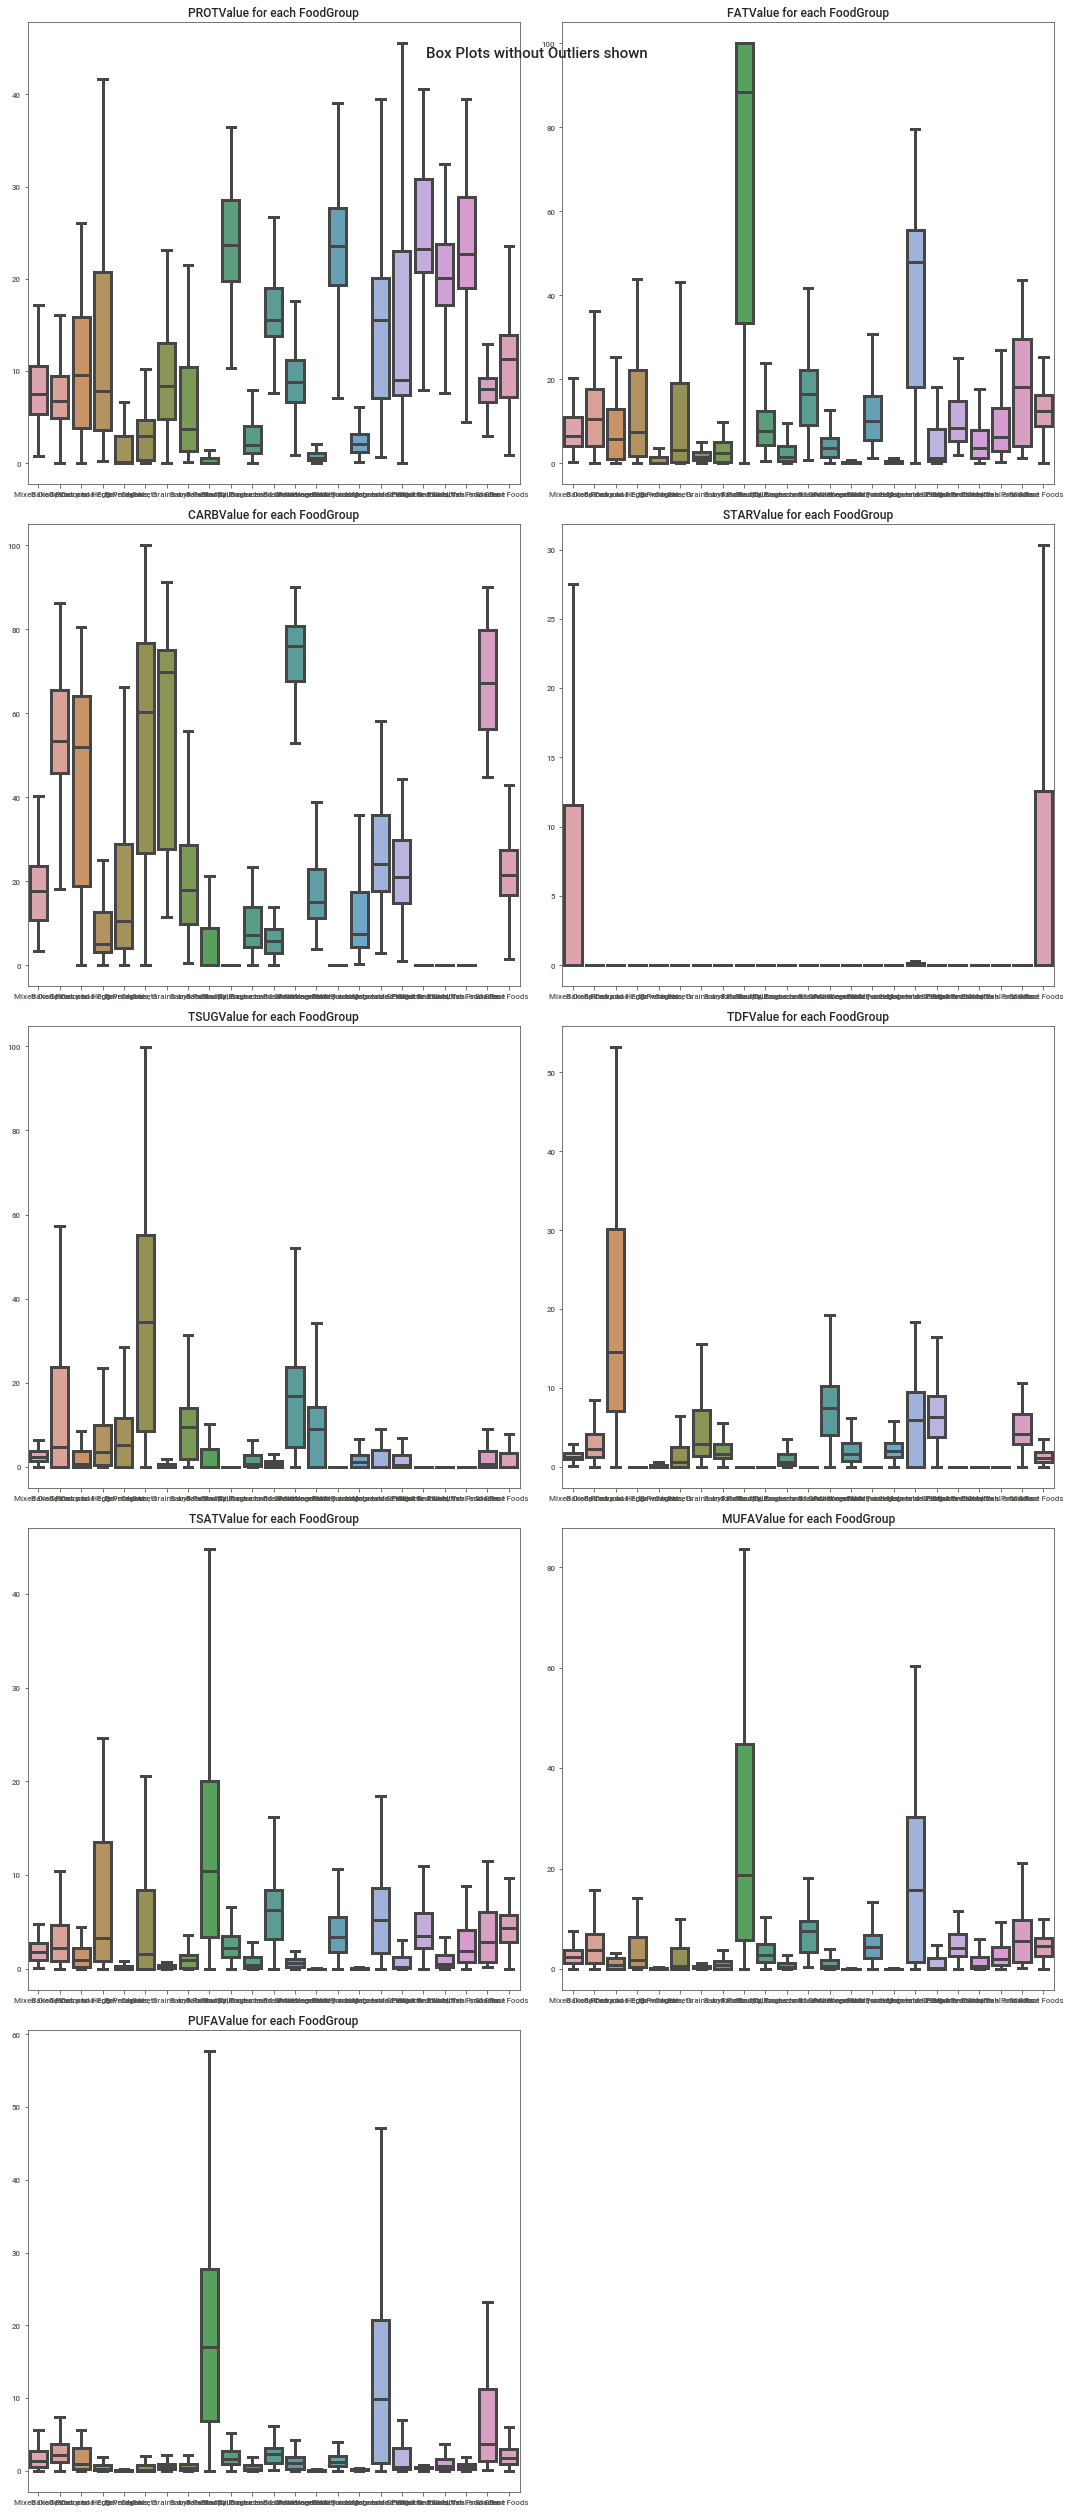

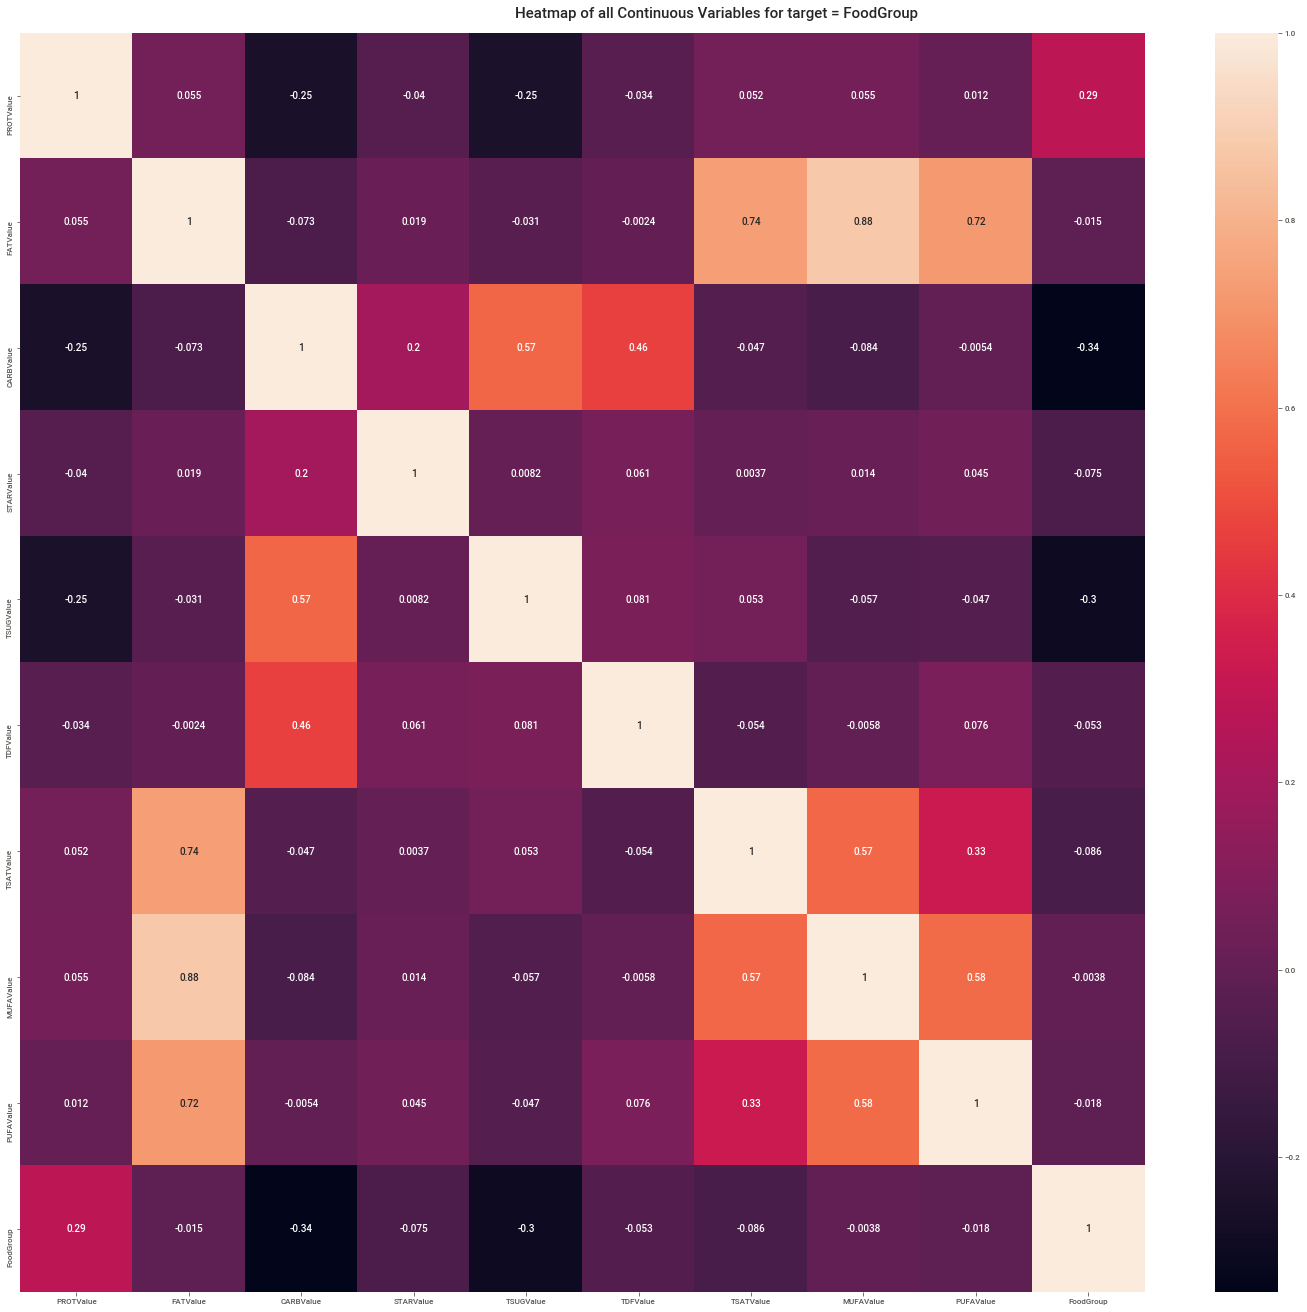

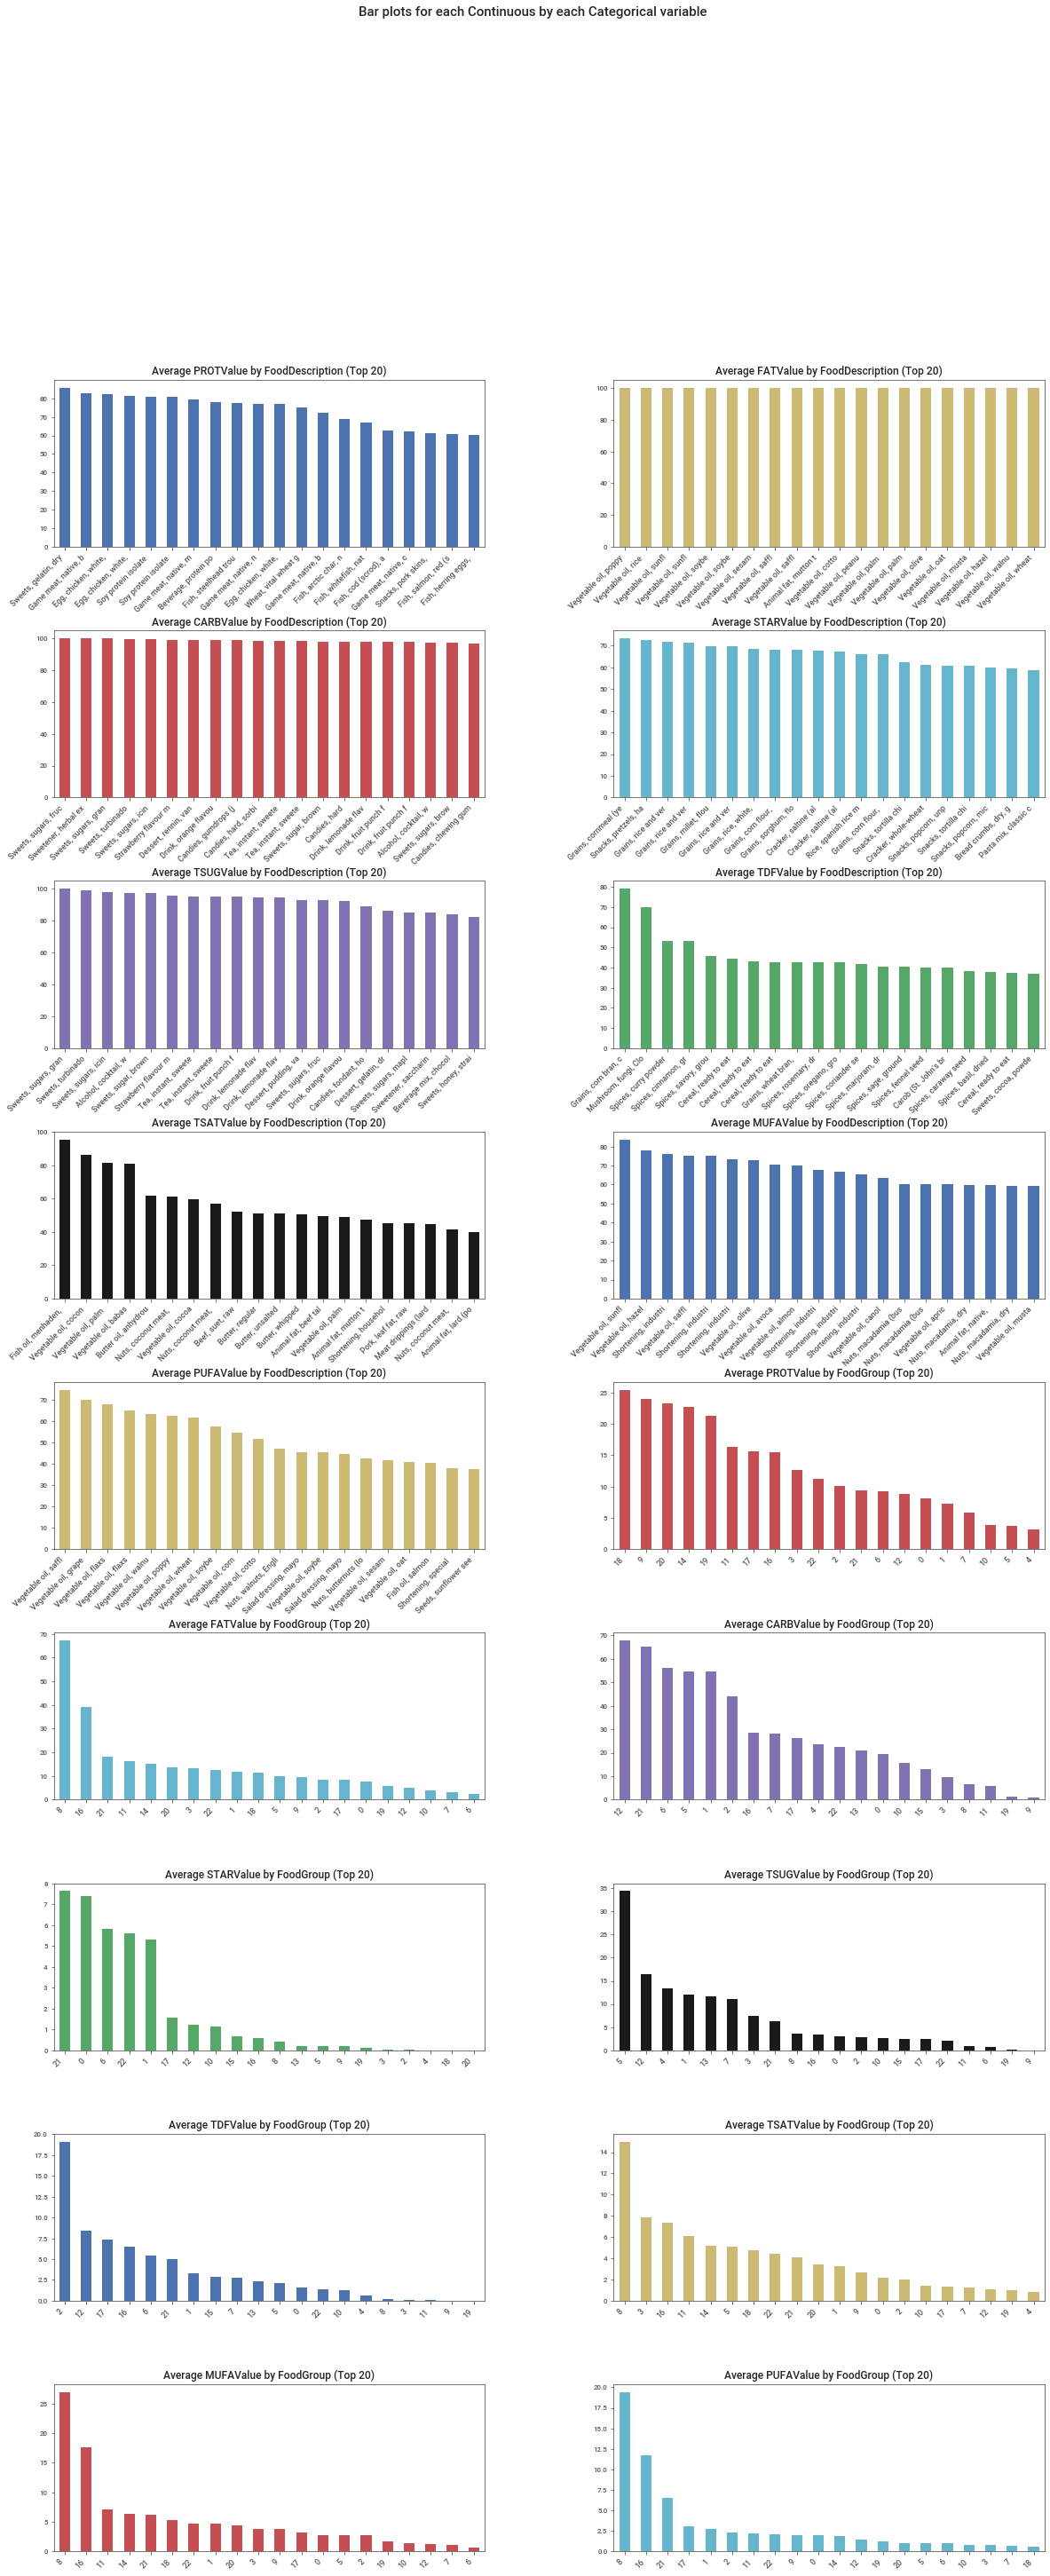

Time to run AutoViz (in seconds) = 29.156

 ###################### VISUALIZATION Completed ########################


In [41]:
f = AV.AutoViz('FoodNutritionData.csv', depVar='FoodGroup')